In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [41]:
from sklearn.model_selection import train_test_split

In [64]:
from sklearn import ensemble, gaussian_process, linear_model, naive_bayes, neighbors, svm, tree, model_selection
from sklearn.metrics import mean_squared_error, confusion_matrix, precision_score, recall_score, auc, roc_curve

In [9]:
# Load data
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')
df_total = [df_train, df_test]

In [10]:
for df in df_total:
    df['Salutation'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [11]:
pd.crosstab(df_train['Salutation'], df_train['Sex'])

Sex,female,male
Salutation,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [12]:
pd.crosstab(df_test['Salutation'], df_test['Sex'])

Sex,female,male
Salutation,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [13]:
for df in df_total:
    df['Salutation'].replace(
        ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
        'Rare',
        inplace=True
    )
    df['Salutation'].replace(
        ['Mlle', 'Ms'],
        'Miss',
        inplace=True
    )
    df['Salutation'].replace(
        'Mme',
        'Mrs',
        inplace=True
    )
    df['Salutation'] = pd.factorize(df['Salutation'])[0]



In [14]:
pd.crosstab(
    df_train['Salutation'],
    df_train['Sex']
)

Sex,female,male
Salutation,,
0,0,517
1,126,0
2,185,0
3,0,40
4,3,20


In [15]:
pd.crosstab(
    df_test['Salutation'],
    df_test['Sex']
)

Sex,female,male
Salutation,,
0,0,240
1,72,0
2,79,0
3,0,21
4,1,5


In [16]:
for df in df_total:
    df.drop(
        ['PassengerId', 'Name', 'Ticket', 'Cabin'],
        axis=1,
        inplace=True
    )
df_train.shape, df_test.shape


((891, 9), (418, 8))

## Detect and fill NaN ##

In [20]:
def fill_age(dataframe, inplace=True):
    length = len(dataframe.groupby('Salutation'))
    for index in range(length - 1):
        median_age = dataframe[dataframe['Salutation'] == index]['Age'].median()
        dataframe['Age'].fillna(median_age, inplace=inplace)


for df in df_total:
    fill_age(df)

In [21]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      2
Salutation    0
dtype: int64

In [22]:
def fill_embarked(dataframe, inplace=True):
    dataframe['Embarked'].fillna('C', inplace=inplace)
    

for df in df_total:
    fill_embarked(df)

In [23]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Salutation    0
dtype: int64

In [24]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked      0
Salutation    0
dtype: int64

In [25]:
df_test[df_test['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
152,3,male,60.5,0,0,NaN,S,0


In [26]:
def fill_fare(dataframe, inplace=True):
    condition = (dataframe['Pclass'] == 3) & (dataframe['Embarked'] == 'S') & (dataframe['Salutation'] == 0)
    median = dataframe[condition]['Fare'].median()
    dataframe['Fare'].fillna(median, inplace=inplace)

fill_fare(df_test)

In [27]:
df_test.isnull().any()

Pclass        False
Sex           False
Age           False
SibSp         False
Parch         False
Fare          False
Embarked      False
Salutation    False
dtype: bool

In [28]:
df_train.isnull().any()

Survived      False
Pclass        False
Sex           False
Age           False
SibSp         False
Parch         False
Fare          False
Embarked      False
Salutation    False
dtype: bool

## Age Process ##

In [29]:
for dataset in df_total:
    dataset.loc[dataset["Age"] <= 9, "Age"] = 0
    dataset.loc[(dataset["Age"] > 9) & (dataset["Age"] <= 19), "Age"] = 1
    dataset.loc[(dataset["Age"] > 19) & (dataset["Age"] <= 29), "Age"] = 2
    dataset.loc[(dataset["Age"] > 29) & (dataset["Age"] <= 39), "Age"] = 3
    dataset.loc[(dataset["Age"] > 29) & (dataset["Age"] <= 39), "Age"] = 3
    dataset.loc[dataset["Age"] > 39, "Age"] = 4

In [30]:
df_train.groupby('Age').size()

Age
0.0     62
1.0    102
2.0    220
3.0    344
4.0    163
dtype: int64

# Fare Process #

In [33]:
pd.qcut(df_train['Fare'], 8).value_counts()

(-0.001, 7.75]       140
(9.841, 14.454]      113
(69.488, 512.329]    112
(24.479, 31.0]       112
(7.91, 9.841]        111
(31.0, 69.488]       110
(14.454, 24.479]     110
(7.75, 7.91]          83
Name: Fare, dtype: int64

In [34]:
for dataset in df_total:
    dataset.loc[dataset["Fare"] <= 7.75, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.75) & (dataset["Fare"] <= 7.91), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 9.841), "Fare"] = 2
    dataset.loc[(dataset["Fare"] > 9.841) & (dataset["Fare"] <= 14.454), "Fare"] = 3   
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 24.479), "Fare"] = 4
    dataset.loc[(dataset["Fare"] > 24.479) & (dataset["Fare"] <= 31), "Fare"] = 5   
    dataset.loc[(dataset["Fare"] > 31) & (dataset["Fare"] <= 69.487), "Fare"] = 6
    dataset.loc[dataset["Fare"] > 69.487, "Fare"] = 7

In [35]:
df_train.groupby('Fare').size()

Fare
0.0    140
1.0     83
2.0    111
3.0    106
4.0    117
5.0    112
6.0    110
7.0    112
dtype: int64

## Process Sex and Embarked ##

In [36]:
for dataset in df_total:
    dataset['Sex'] = pd.factorize(dataset['Sex'])[0]
    dataset['Embarked'] = pd.factorize(dataset['Embarked'])[0]

In [38]:
df_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
468,0,3,0,3.0,0,0,0.0,2,0
575,0,3,0,1.0,0,0,4.0,0,0
291,1,1,1,1.0,1,0,7.0,1,1
201,0,3,0,3.0,8,2,7.0,0,0
714,0,2,0,4.0,0,0,3.0,0,0


## Checking the correlation between features ##

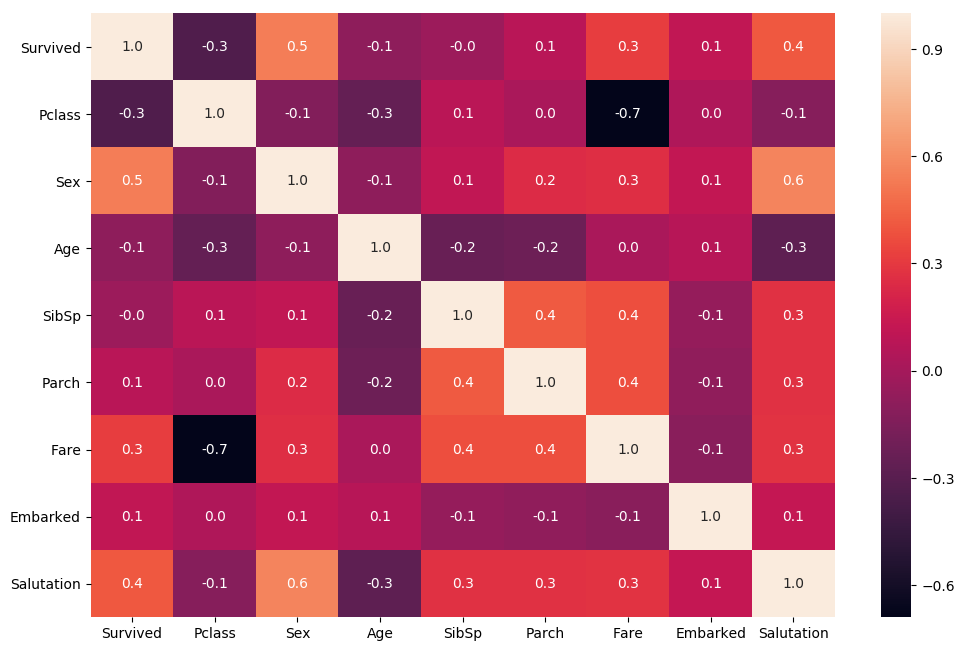

In [39]:
sns.heatmap(df_train.corr(), annot=True, fmt='.1f')
plt.show()

## Spliting Data ##

In [40]:
x = df_train.drop('Survived', axis=1).values
y = df_train['Survived'].values

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Performance Comparision ##

In [50]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(max_iter=1000, tol=0.001),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(max_iter=1000, tol=0.001),
    linear_model.Perceptron(max_iter=1000, tol=0.001),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
   #tree.ExtraTreeClassifier(),
    
    ]

In [51]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns=MLA_columns)

row_index = 0
for alg in MLA:    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    row_index = row_index + 1
    
MLA_compare.sort_values(
    by=['MLA Test Accuracy'], 
    ascending=False, 
    inplace=True
)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA AUC
2,ExtraTreesClassifier,0.9101,0.8268,0.857143,0.636364,0.787208
1,BaggingClassifier,0.9031,0.8212,0.840000,0.636364,0.782784
5,GaussianProcessClassifier,0.8792,0.8212,0.854167,0.621212,0.779633
14,SVC,0.8511,0.8212,0.814815,0.666667,0.789086
17,DecisionTreeClassifier,0.9101,0.8101,0.820000,0.621212,0.770783
15,NuSVC,0.8385,0.8101,0.785714,0.666667,0.780236
13,KNeighborsClassifier,0.8497,0.8101,0.807692,0.636364,0.773934
16,LinearSVC,0.8076,0.7989,0.758621,0.666667,0.771386
0,AdaBoostClassifier,0.8329,0.7989,0.767857,0.651515,0.768235
6,LogisticRegressionCV,0.8034,0.7989,0.758621,0.666667,0.771386


In [55]:
def plot_bar(y_name, title=None):
    if title==None:
        title = y_name + ' Comparison'
    sns.barplot(
        x="MLA Name", 
        y=y_name,
        data=MLA_compare,
        palette='hot',
        edgecolor=sns.color_palette('dark', 7)
    )
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()
    

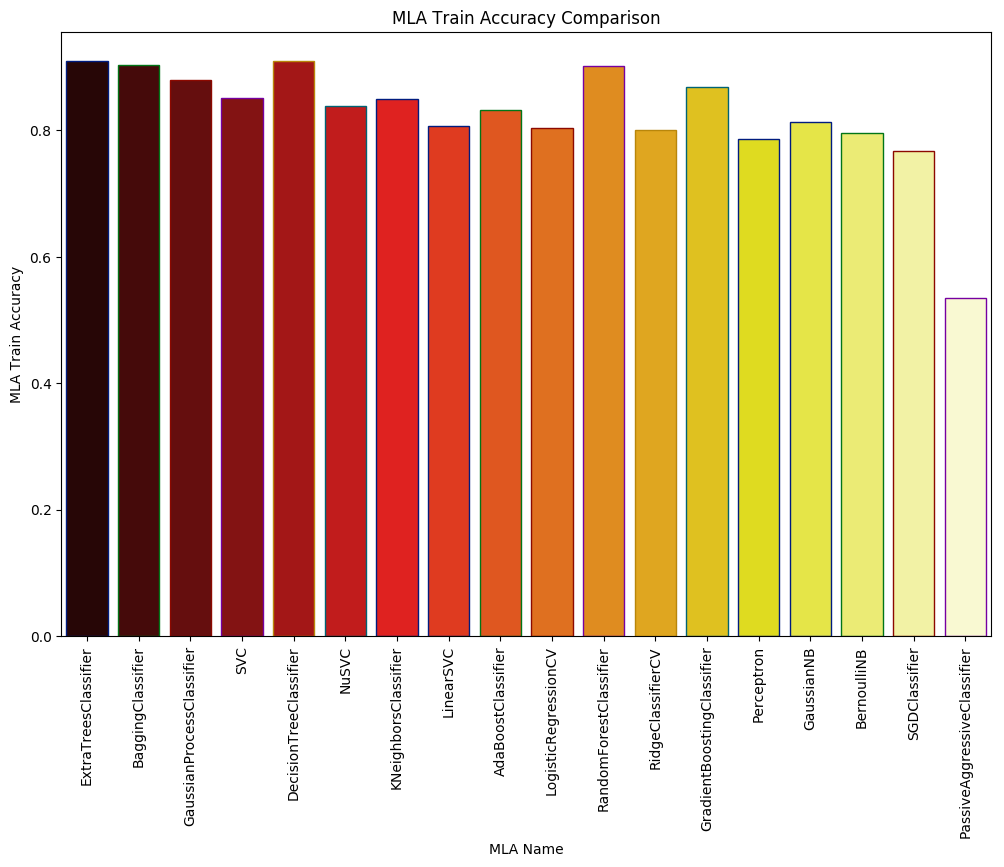

In [56]:
plot_bar('MLA Train Accuracy')

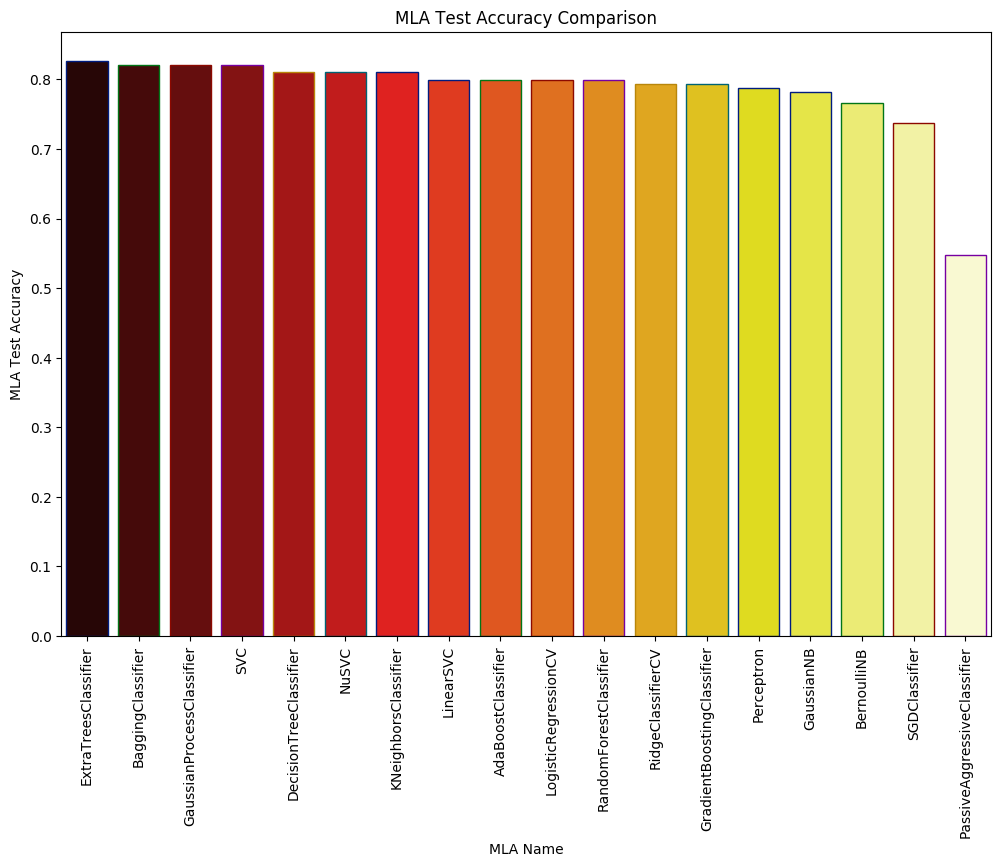

In [57]:
plot_bar('MLA Test Accuracy')

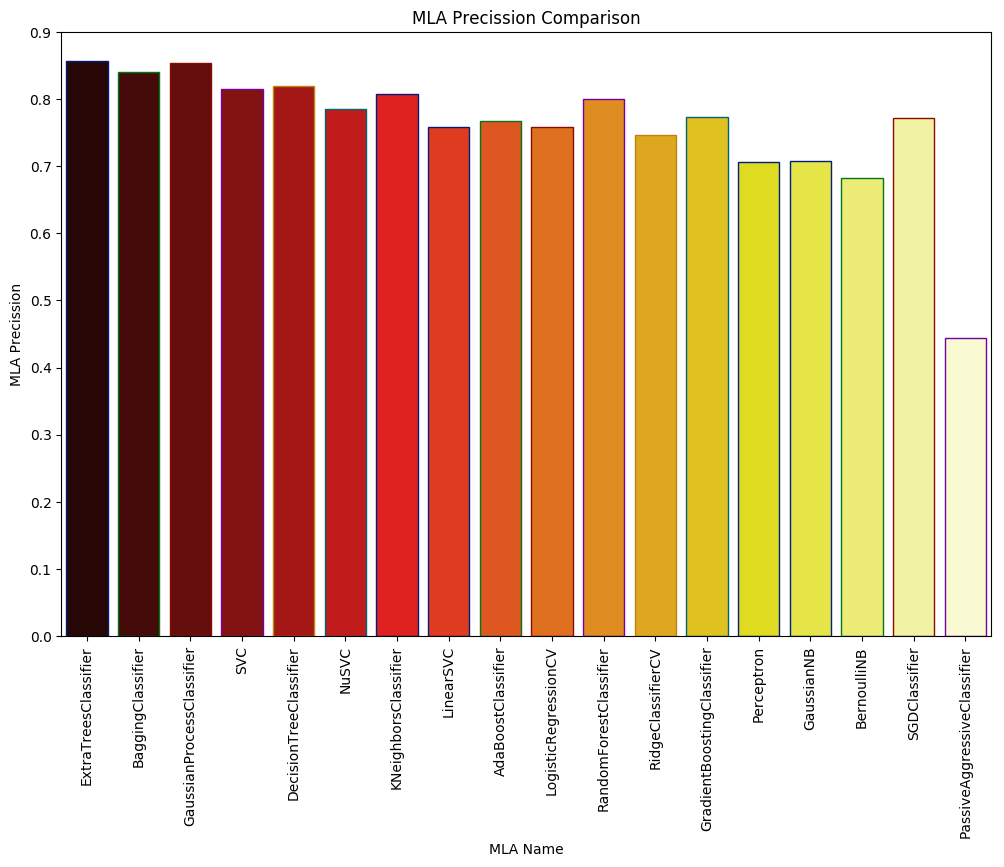

In [58]:
plot_bar('MLA Precission')

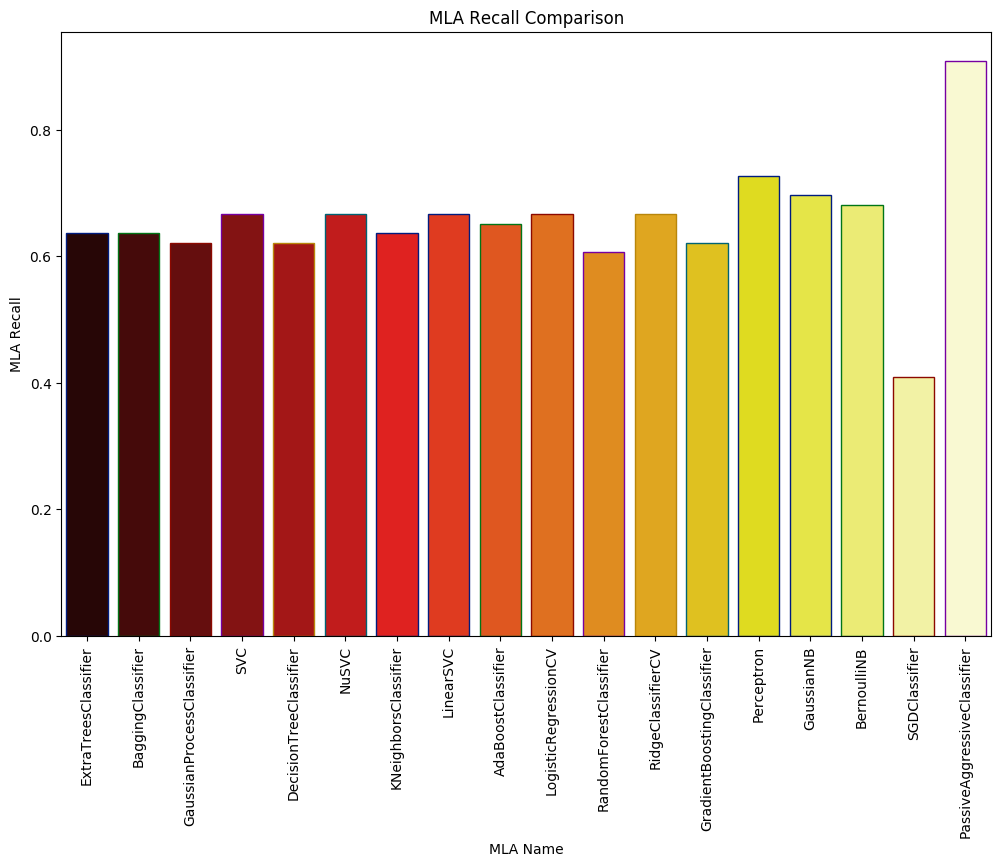

In [59]:
plot_bar('MLA Recall')

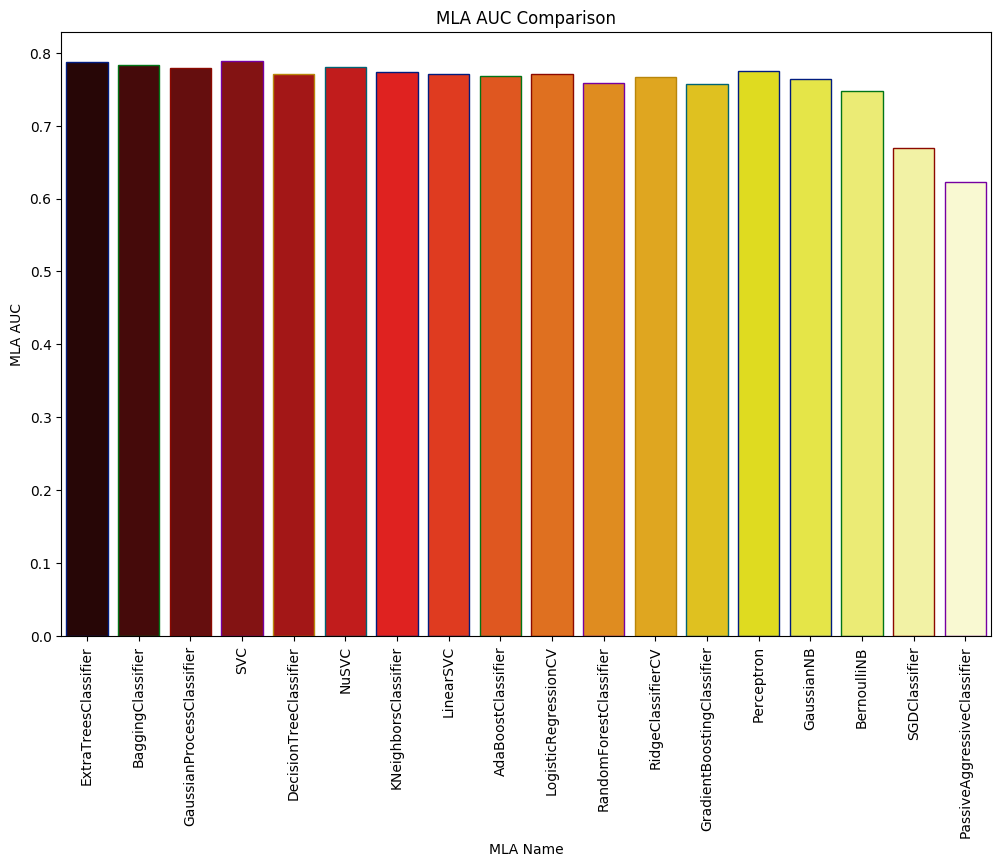

In [60]:
plot_bar('MLA AUC')

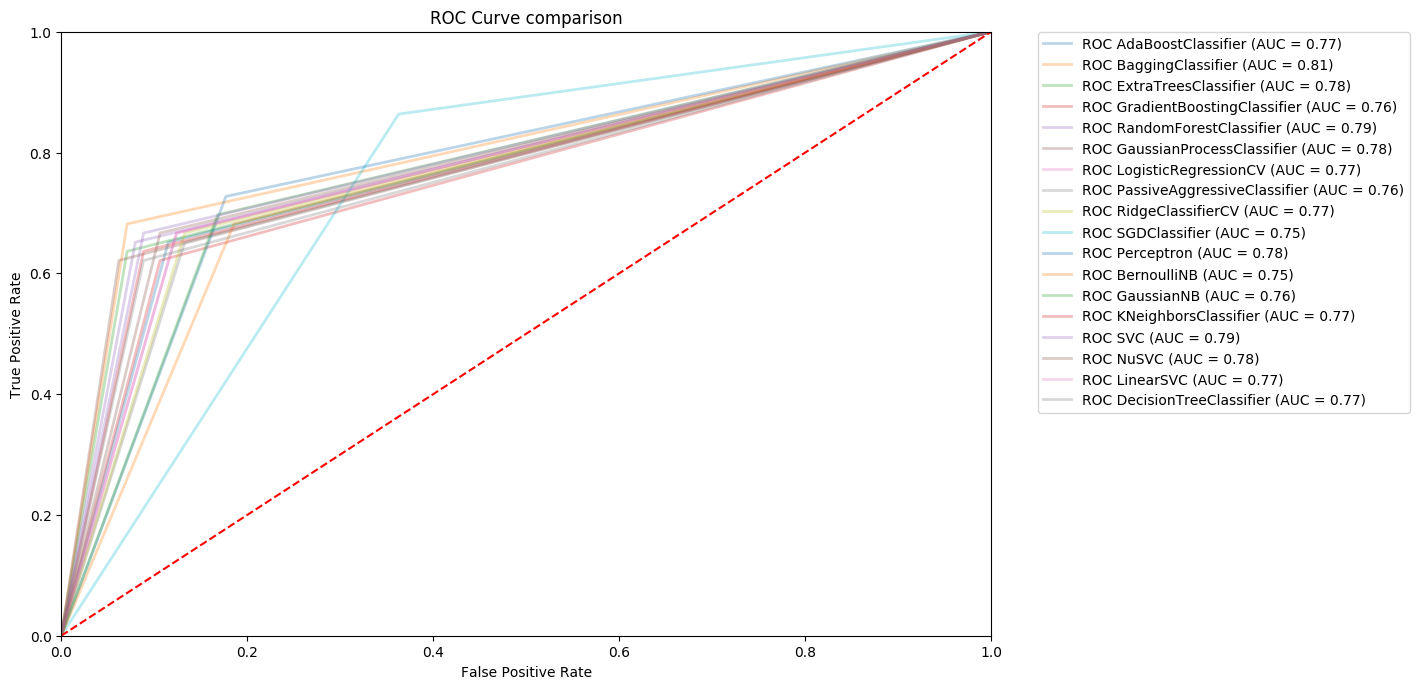

In [61]:
index = 1
for alg in MLA:
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
    index = index + 1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

## 4. Tuning the algorithm ##

In [62]:
tunealg = ensemble.ExtraTreesClassifier()
tunealg.fit(x_train, y_train)

print('BEFORE tuning Parameters: ', tunealg.get_params())
print("BEFORE tuning Training w/bin set score: {:.2f}". format(tunealg.score(x_train, y_train))) 
print("BEFORE tuning Test w/bin set score: {:.2f}". format(tunealg.score(x_test, y_test)))
print('-'*10)

BEFORE tuning Parameters:  {'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
BEFORE tuning Training w/bin set score: 0.91
BEFORE tuning Test w/bin set score: 0.82
----------


In [78]:
#tune parameters
param_grid = {#'bootstrap': [True, False],
              #'class_weight': ['balanced' , None],
              'max_depth': [1, 2,3,4, None],
              'max_features': ['log2', 'auto'],
              #'max_leaf_nodes': [0,1,2,3,4, None],
              #'min_impurity_decrease': [True, False, None],
              #'min_impurity_split': [True, False],
              #'min_samples_leaf': [1, 2,3,4,5],
              #'min_samples_split': [1,2,3,4,5],
              #'min_weight_fraction_leaf': [0.0,1.0,2.0,3.0,4.0,5.0], 
              #'n_estimators': [10,15,25,35,45], 
              'n_jobs':  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
              #'oob_score': [True, False], 
              'random_state': [0, 1, 2, 3, 4, None], 
              #'verbose': [0,1, 2,3,4, 5], 
              #'warm_start': [True, False]
             }
# pac = linear_model.PassiveAggressiveClassifier(max_iter=1000, tol=0.001)
algorithm = ensemble.RandomForestClassifier()
# So, what this GridSearchCV function do is finding the best combination of parameters value that is set above.
tune_model = model_selection.GridSearchCV(algorithm, param_grid=param_grid, scoring = 'roc_auc')
tune_model.fit(x_train, y_train)

print('AFTER tuning Parameters: ', tune_model.best_params_)
print("AFTER tuning Training w/bin set score: {:.2f}". format(tune_model.score(x_train, y_train))) 
print("AFTER tuning Test w/bin set score: {:.2f}". format(tune_model.score(x_test, y_test)))
print('-'*10)

AFTER tuning Parameters:  {'max_depth': 4, 'max_features': 'log2', 'n_jobs': 8, 'random_state': None}
AFTER tuning Training w/bin set score: 0.89


AFTER tuning Test w/bin set score: 0.84
----------


In [ ]:
x_need_to_predict = df_test.values
y_predict = tune_model.predict(x_need_to_predict)
hihi = pd.read_csv('./input/test.csv')
pass_id = hihi['PassengerId']
output = pd.DataFrame({'PassengerId': pass_id,
                       'Survived': y_predict
                       })
output.head()
output.to_csv('./output/submission.csv', index=False)


In [77]:
print('test')

test
